## Numerical Simulation Laboratory (NSL)

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

### Exercise 1

The goal of this exercise is to compute the integral $I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$ via Monte Carlo tecnique by using both uniform and *importance sampling*.

For the importance sampling technique random numbers $x_i$ are drawn
according to the probability distribution $p(x)=2(1-x)$.
Then the estimate of the result of the integral is obtained by calculating the average $\langle \frac{f(x_i)}{p(x_i)}\rangle$.
Results are shown below.

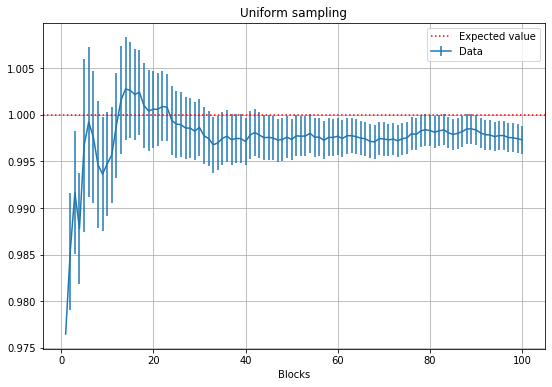

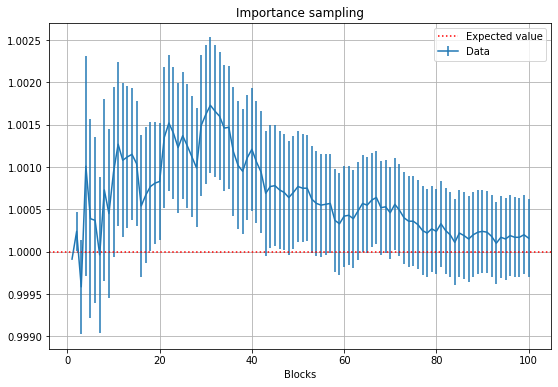

In [10]:
plt.figure(1, figsize = (9, 6))
x_uni, y_uni, yerr_uni = np.loadtxt("Exercise_01/output_uniform.dat", delimiter = "   ", unpack = True)
plt.title("Uniform sampling")
plt.xlabel('Blocks')
plt.grid(True)
plt.axhline(y=1, color='r', linestyle="dotted", label = "Expected value")
plt.errorbar(x_uni, y_uni, yerr_uni, label = "Data")
plt.legend()

plt.figure(2, figsize = (9, 6))
x_imp, y_imp, yerr_imp = np.loadtxt("Exercise_01/output_importance.dat", delimiter = "   ", unpack = True)
plt.title("Importance sampling")
plt.xlabel('Blocks')
plt.grid(True)
plt.axhline(y=1, color='r', linestyle="dotted", label = "Expected value")
plt.errorbar(x_imp, y_imp, yerr_imp, label = "Data")
plt.legend()

As expected the resusult obtained using importance sampling technique is in a better agreement with the exact result than the one obtained with uniform sampling.

### Exercise 2

For this exercise I had to produce two pictures of the mean distance from the origin of two walkers which live respectiveley on a cubic lattice and in the continuum, obtained repeating $10^4$ times the simulation.
Both walkers have unitary step lenght.
The picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs, with their statistical uncertainties, as function of the step $i\in [0,10^2]$ is shown below.

<ErrorbarContainer object of 3 artists>

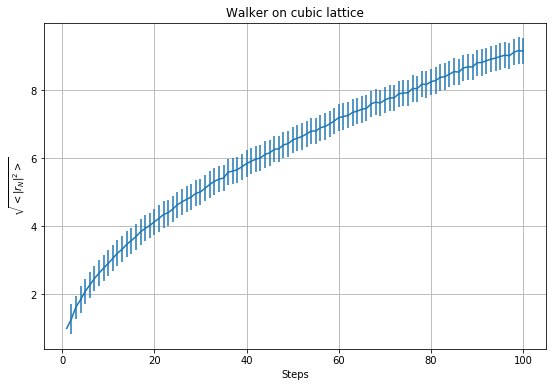

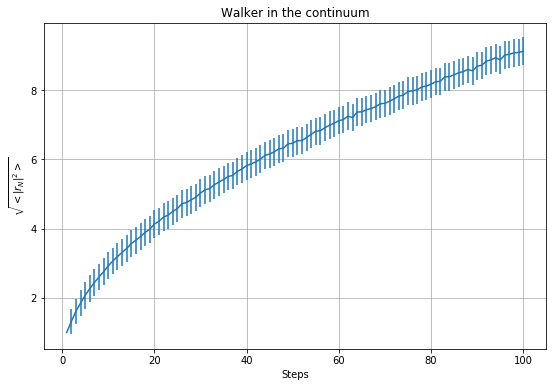

In [32]:
plt.figure(1, figsize = (9, 6))
x_cub, y_cub, yerr_cub = np.loadtxt("Exercise_02/output1.dat", delimiter = "   ", unpack = True)
plt.title("Walker on cubic lattice")
plt.xlabel('Steps')
plt.ylabel("$\sqrt{<|{r}_N|^2 >}$")
plt.grid(True)
plt.errorbar(x_cub, y_cub, yerr_cub)

plt.figure(2, figsize = (9, 6))
x_cont, y_cont, yerr_cont = np.loadtxt("Exercise_02/output2.dat", delimiter = "   ", unpack = True)
plt.title("Walker in the continuum")
plt.xlabel('Steps')
plt.ylabel("$\sqrt{<|{r}_N|^2 >}$")
plt.grid(True)
plt.errorbar(x_cont, y_cont, yerr_cont)

I then tried to fit the results obtained with a function like $f(N)=k\sqrt{N}$. 

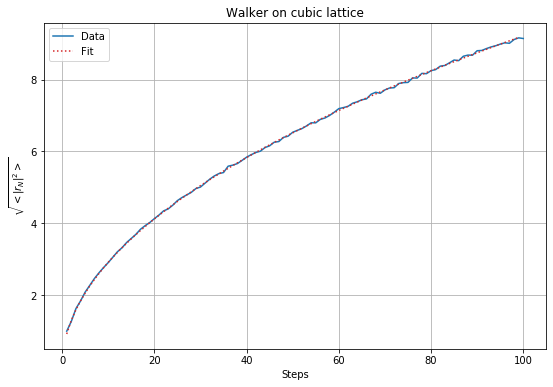

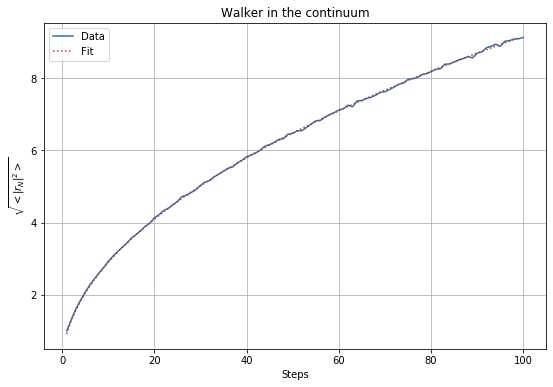

In [47]:
def f(N, k):
    return k*np.sqrt(N);

popt_cub, pcov_cub = curve_fit(f, x_cub, y_cub)
popt_cont, pcov_cont = curve_fit(f, x_cont, y_cont)

plt.figure(1, figsize = (9, 6))
plt.plot(x_cub, y_cub, label="Data")
plt.plot(np.arange(1,100,1), f(np.arange(1,100,1), popt_cub[0]), color="tab:red", linestyle="dotted", label="Fit")
plt.title("Walker on cubic lattice")
plt.xlabel('Steps')
plt.ylabel("$\sqrt{<|{r}_N|^2 >}$")
plt.grid(True)
plt.legend()

plt.figure(2, figsize = (9, 6))
plt.plot(x_cont, y_cont, label="Data")
plt.plot(np.arange(1,100,1), f(np.arange(1,100,1), popt_cont[0]), color="tab:red", linestyle="dotted", label="Fit")
plt.title("Walker in the continuum")
plt.xlabel('Steps')
plt.ylabel("$\sqrt{<|{r}_N|^2 >}$")
plt.grid(True)
plt.legend()

The data obtained with the two walkers are almost indistinguishble and both are perfectly fitted by the function $k\sqrt{N}$ typical of diffusive processes.